In [1]:
import requests    
import json            
import pandas as pd    
import numpy as np     
                      

import matplotlib.pyplot as plt
    
import datetime as dt  
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
root_url = 'https://api.binance.com/api/v1/klines'

In [3]:
def get_bars(symbol, interval = '1d'):
   url = root_url + '?symbol=' + symbol + '&interval=' + interval
   data = json.loads(requests.get(url).text)
   df = pd.DataFrame(data)
   df.columns = ['open_time',
                 'Open', 'High', 'Low', 'Close', 'Volume',
                 'close_time', 'qav', 'num_trades',
                 'taker_base_vol', 'taker_quote_vol', 'ignore']
   df.index = [dt.datetime.fromtimestamp(x/1000.0) for x in df.close_time]
   return df

In [4]:
# using the our function to import data from Binance
ethusdt = get_bars('ETHUSDT')
print(ethusdt.tail(1))
btcusdt = get_bars('BTCUSDT')
print(btcusdt.tail(1))
solusdt = get_bars('SOLUSDT') # 2
print(solusdt.tail(1))
aaveusdt = get_bars('AAVEUSDT') # 2
print(aaveusdt.tail(1))
sushiusdt = get_bars('SUSHIUSDT') # 2
print(sushiusdt.tail(1))

                             open_time           Open           High  \
2021-03-14 18:59:59.999  1615680000000  1922.35000000  1933.10000000   

                                   Low          Close           Volume  \
2021-03-14 18:59:59.999  1836.00000000  1867.39000000  574893.20602000   

                            close_time                  qav  num_trades  \
2021-03-14 18:59:59.999  1615766399999  1082082387.51632560      884794   

                          taker_base_vol     taker_quote_vol ignore  
2021-03-14 18:59:59.999  273119.66064000  514115739.51186510      0  
                             open_time            Open            High  \
2021-03-14 18:59:59.999  1615680000000  61188.38000000  61724.79000000   

                                    Low           Close          Volume  \
2021-03-14 18:59:59.999  59300.00000000  60102.23000000  46222.10007300   

                            close_time                  qav  num_trades  \
2021-03-14 18:59:59.999  1615766399999  

In [5]:
btc_c = btcusdt['Close']
eth_c = ethusdt['Close']
aave_c = aaveusdt['Close']
sol_c = solusdt['Close']
sushi_c = sushiusdt['Close'] 

In [6]:
combined = pd.merge(btc_c, eth_c, on=btc_c.index, how='outer')

In [7]:
combined = combined.rename(columns={'Close_x':'BTC', 'Close_y': 'ETH', 'key_0': 'Date'})

In [8]:
combined = combined.set_index('Date')

In [9]:
combined = combined.join(aave_c)
combined = combined.rename(columns={'Close':'AAVE'})

In [10]:
combined = combined.join(sol_c)
combined = combined.rename(columns={'Close':'SOL'})

In [11]:
combined = combined.join(sushi_c)
combined = combined.rename(columns={'Close':'SUSHI'})

In [12]:
combined

,BTC,ETH,AAVE,SOL,SUSHI
Date,,,,,
2019-11-01 18:59:59.999,9231.61000000,182.85000000,NaN,NaN,NaN
2019-11-02 18:59:59.999,9289.52000000,182.91000000,NaN,NaN,NaN
2019-11-03 17:59:59.999,9194.71000000,181.54000000,NaN,NaN,NaN
2019-11-04 17:59:59.999,9393.35000000,185.71000000,NaN,NaN,NaN
2019-11-05 17:59:59.999,9308.66000000,188.68000000,NaN,NaN,NaN
...,...,...,...,...,...
2021-03-10 17:59:59.999,55851.59000000,1795.12000000,406.84800000,14.20480000,17.93100000
2021-03-11 17:59:59.999,57773.16000000,1825.78000000,404.84600000,16.03100000,18.61000000
2021-03-12 17:59:59.999,57221.72000000,1766.10000000,373.76300000,14.55970000,19.40600000


In [13]:
combined['BTC'] = pd.to_numeric(combined["BTC"])

In [14]:
combined['ETH'] = pd.to_numeric(combined["ETH"])

In [15]:
combined['AAVE'] = pd.to_numeric(combined["AAVE"])

In [16]:
combined['SOL'] = pd.to_numeric(combined["SOL"])

In [17]:
combined['SUSHI'] = pd.to_numeric(combined["SUSHI"])

In [18]:
combined = combined.reset_index()

In [19]:
combined['Date'] = pd.to_datetime(combined['Date'])

In [20]:
combined = combined.set_index('Date')

In [21]:
combined_pct = combined.pct_change() 
combined_pct = combined_pct.dropna()
combined_pct.head()

,BTC,ETH,AAVE,SOL,SUSHI
Date,,,,,
2020-10-16 18:59:59.999,-0.016149,-0.032147,-0.082281,-0.056609,-0.066761
2020-10-17 18:59:59.999,0.003612,0.007715,0.048250,0.030610,0.009132
2020-10-18 18:59:59.999,0.012583,0.026580,-0.014868,0.004398,0.076923
2020-10-19 18:59:59.999,0.021588,0.003147,-0.117055,-0.070339,-0.054622
2020-10-20 18:59:59.999,0.013489,-0.028421,-0.106170,-0.084596,-0.071111


In [22]:
combined_pct.corr()

,BTC,ETH,AAVE,SOL,SUSHI
BTC,1.000000,0.669861,0.200313,0.233368,0.253223
ETH,0.669861,1.000000,0.474740,0.383895,0.390520
AAVE,0.200313,0.474740,1.000000,0.436933,0.567427
SOL,0.233368,0.383895,0.436933,1.000000,0.337889
SUSHI,0.253223,0.390520,0.567427,0.337889,1.000000


In [23]:
corr = combined_pct.corr()
corr.style.background_gradient(cmap='RdYlGn').set_precision(2)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,BTC,ETH,AAVE,SOL,SUSHI
BTC,1.00,0.67,0.20,0.23,0.25
ETH,0.67,1.00,0.47,0.38,0.39
AAVE,0.20,0.47,1.00,0.44,0.57
SOL,0.23,0.38,0.44,1.00,0.34
SUSHI,0.25,0.39,0.57,0.34,1.00


In [24]:
# cum_returns
cum_returns = (1 + combined_pct).cumprod()

In [25]:
cum_returns

,BTC,ETH,AAVE,SOL,SUSHI
Date,,,,,
2020-10-16 18:59:59.999,0.983851,0.967853,0.917719,0.943391,0.933239
2020-10-17 18:59:59.999,0.987404,0.975320,0.961999,0.972269,0.941761
2020-10-18 18:59:59.999,0.999828,1.001245,0.947696,0.976545,1.014205
2020-10-19 18:59:59.999,1.021412,1.004396,0.836764,0.907856,0.958807
2020-10-20 18:59:59.999,1.035190,0.975850,0.747924,0.831055,0.890625
...,...,...,...,...,...
2021-03-10 17:59:59.999,4.854499,4.753522,9.461801,6.262587,25.470170
2021-03-11 17:59:59.999,5.021517,4.834710,9.415242,7.067719,26.434659
2021-03-12 17:59:59.999,4.973587,4.676676,8.692365,6.419055,27.565341


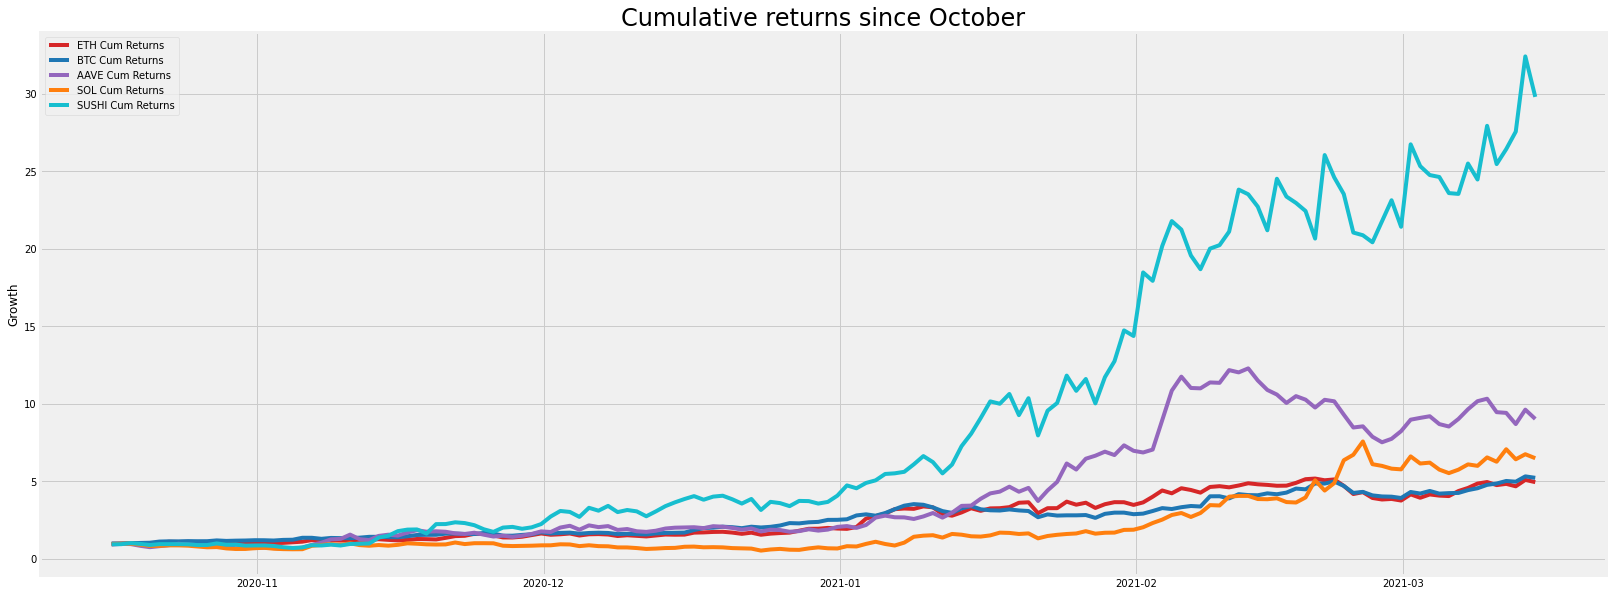

In [26]:
f, ax = plt.subplots(figsize=(25,10))


ax.plot(cum_returns['ETH'], color='tab:red', label = 'ETH Cum Returns')
ax.plot(cum_returns['BTC'], color='tab:blue', label = 'BTC Cum Returns')
ax.plot(cum_returns['AAVE'], color='tab:purple', label = 'AAVE Cum Returns') 
ax.plot(cum_returns['SOL'], color='tab:orange', label = 'SOL Cum Returns') 
ax.plot(cum_returns['SUSHI'], color='tab:cyan', label = 'SUSHI Cum Returns')



ax.grid(True)
ax.set_title('Cumulative returns since October', fontsize='24')
ax.set_ylabel('Growth')
ax.legend()

In [27]:
cum_returns.tail(1)

,BTC,ETH,AAVE,SOL,SUSHI
Date,,,,,
2021-03-14 18:59:59.999,5.223955,4.944895,9.023466,6.489198,29.806818


In [28]:
data = {'Crypto': ['BTC', 'ETH', 'AAVE', 'SOL', 'SUSHI'],
        'ROI': [5.223955, 4.944895, 9.023466, 6.489198, 29.806818]} 
  
# Create DataFrame 
df = pd.DataFrame(data) 
  
# Print the output. 
df 

,Crypto,ROI
0,BTC,5.223955
1,ETH,4.944895
2,AAVE,9.023466
3,SOL,6.489198
4,SUSHI,29.806818


In [29]:
df = df.set_index('Crypto')

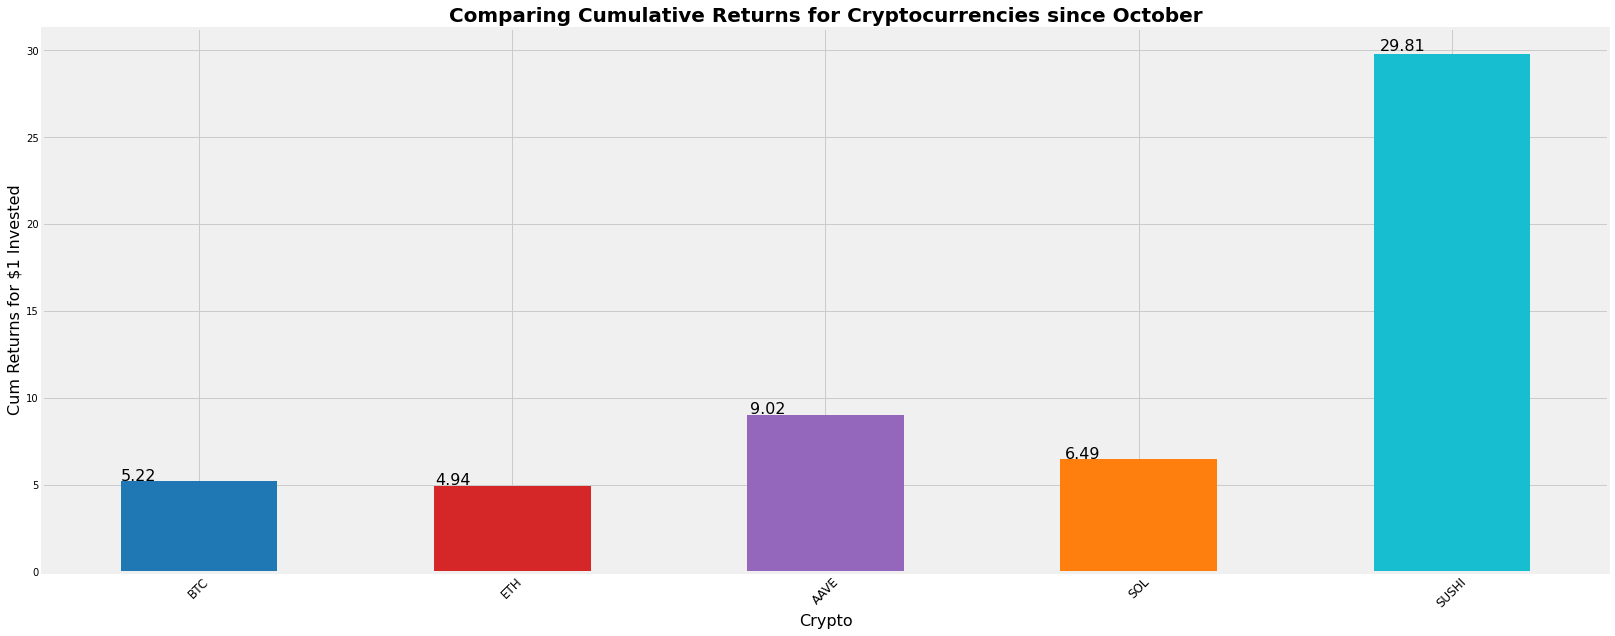

In [31]:
f,ax=plt.subplots(figsize=(25,10))

df['ROI'].plot.bar(color=['tab:blue', 'tab:red', 'tab:purple', 'tab:orange', 'tab:cyan'])
ax.set_title('Comparing Cumulative Returns for Cryptocurrencies since October', fontsize = 20, fontweight = 'bold')
ax.set_xlabel('Crypto', fontsize = 16)
ax.set_ylabel('Cum Returns for $1 Invested', fontsize = 16)
plt.xticks(rotation=45, fontsize = 12)
ax.grid(True)

for p in ax.patches:
    ax.annotate(str(p.get_height().round(2)), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=16)